### 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

### 2. Load the data

In [2]:
#Load the data
california_housing_prices_df = pd.read_csv('dataset/housing.csv')

# Print the data structure
print(california_housing_prices_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


### 3. Explore the data

In [3]:
california_housing_prices_df.shape

(20640, 10)

In [4]:
# Get the number of columns and rows in the DataFrame
num_columns = len(california_housing_prices_df.columns)
num_rows = len(california_housing_prices_df.index)

# Print the number of columns and rows
print("The DataFrame has {} columns and {} rows.".format(num_columns, num_rows))

The DataFrame has 10 columns and 20640 rows.


In [5]:
# View the first 5 rows of the DataFrame
california_housing_prices_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# View the last 5 rows of the DataFrame
california_housing_prices_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
# View a random sample of 10 rows from the DataFrame
california_housing_prices_df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12887,-121.34,38.66,18.0,4164.0,963.0,2032.0,898.0,2.1190,133100.0,INLAND
18514,-122.02,36.99,30.0,2156.0,487.0,1023.0,458.0,2.7875,245000.0,NEAR OCEAN
50,-122.27,37.82,21.0,896.0,453.0,735.0,438.0,0.9218,171900.0,NEAR BAY
8425,-118.34,33.92,29.0,1475.0,349.0,965.0,370.0,3.3558,199600.0,<1H OCEAN
2922,-119.02,35.36,47.0,1631.0,340.0,847.0,315.0,2.5062,73700.0,INLAND
20538,-121.73,38.56,30.0,3306.0,629.0,1623.0,648.0,2.8614,145200.0,INLAND
3325,-122.83,38.96,15.0,1318.0,296.0,567.0,276.0,1.8692,93800.0,INLAND
14120,-117.09,32.74,23.0,3130.0,779.0,2472.0,744.0,2.3200,93200.0,NEAR OCEAN
3604,-118.48,34.23,35.0,1963.0,310.0,919.0,297.0,4.7583,258600.0,<1H OCEAN
14402,-117.25,32.79,43.0,906.0,240.0,458.0,205.0,1.8365,328600.0,NEAR OCEAN


In [8]:
# View summary statistics for the DataFrame
california_housing_prices_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# Get the values in the "median_house_value" column for the first 10 rows of the DataFrame
california_housing_prices_df.loc[:10, "median_house_value"]

# Get the values in the "total_bedrooms" column for all rows in the DataFrame where the "median_house_value" is greater than 500000
california_housing_prices_df.loc[california_housing_prices_df["median_house_value"] > 500000, "total_bedrooms"]


89         78.0
459       236.0
493       225.0
494       474.0
509       379.0
          ...  
20422     263.0
20426     138.0
20427    2222.0
20436     409.0
20443      33.0
Name: total_bedrooms, Length: 965, dtype: float64

In [10]:
# Check for missing values
print(california_housing_prices_df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


### 4. Prepare the data for machine learning

- Identifying and handling missing values
- Identifying and removing outliers
- Transforming the data
- Splitting the data into training and testing sets

In [11]:
#impute the missing values in the total_bedrooms column with the median value for the total_bedrooms column. 
#The fillna() method is used to impute the missing values. 
#The inplace=True parameter tells the fillna() method to modify the original DataFrame.

# Get the median value for the total_bedrooms column
total_bedrooms_median = california_housing_prices_df['total_bedrooms'].median()
print(total_bedrooms_median)

# Impute the missing values in the total_bedrooms column with the median value
california_housing_prices_df['total_bedrooms'].fillna(total_bedrooms_median, inplace=True)

435.0


In [12]:
print(california_housing_prices_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [13]:
# Check for missing values
print(california_housing_prices_df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Outlier: 
An outlier is a data point that is significantly different from the other data points in the dataset.
Outliers can be identified by looking at the distribution of the data.
- In the California housing prices dataset, we can identify outliers by looking at the histogram and boxplot of the total_bedrooms column.
- In the histogram, there is an outlier at around 10 bedrooms.
- This is likely a valid outlier, as there are very few houses in the California housing prices dataset with 10 bedrooms.
- In the boxplot, there is an outlier at around 4 bedrooms.
- This may or may not be a valid outlier. It is possible that there are a few houses in the California housing prices dataset with 4 bedrooms that are located in expensive neighborhoods.
- To determine whether or not this outlier is truly an outlier, we would need to further investigate it. We could look at the other features of the house, such as the square footage, location, and amenities, to determine whether or not the outlier is valid.

Here is a simple analogy to understand outliers

- Imagine that you are standing in a crowd of people. Most of the people in the crowd are about the same height. However, there are a few people in the crowd who are much taller or much shorter than the other people. These people are outliers.

- Similarly, in a dataset, most of the data points are similar to each other. However, there are a few data points that are very different from the other data points. These data points are outliers.

- Outliers can be caused by a variety of factors, such as errors in data collection, unusual events, or fraud. It is important to identify and handle outliers before performing data analysis, as outliers can skew the results of the analysis.

In [14]:
# Calculate the z-scores
mean = california_housing_prices_df.mean()
std = california_housing_prices_df.std()
z_scores = (california_housing_prices_df - mean) / std

# Identify the outliers
outlier_indices = []
for col in california_housing_prices_df.columns:
  # Remove the ocean_proximity column from the for loop
  if col != 'ocean_proximity':
    outlier_indices.extend(california_housing_prices_df[col].index[
        np.abs(z_scores[col]) > 3])

# Print the count of outliers
print(len(outlier_indices))

# Print the outliers indices
print(outlier_indices)

1798
[283, 570, 576, 780, 864, 865, 869, 871, 889, 922, 972, 985, 988, 995, 1010, 1021, 1053, 1059, 1060, 1260, 1277, 1380, 1508, 1511, 1524, 1558, 1560, 1590, 1642, 1645, 1700, 1930, 2294, 2311, 2312, 2961, 2963, 2975, 2999, 3147, 3388, 3546, 3560, 3648, 3942, 3981, 3996, 4035, 4038, 4049, 4050, 4070, 5244, 5246, 5347, 5492, 5540, 5630, 5724, 5921, 5924, 5936, 5963, 5964, 5968, 5983, 6055, 6057, 6058, 6060, 6061, 6063, 6065, 6066, 6070, 6287, 6297, 6328, 6329, 6338, 6340, 6401, 6576, 6705, 7099, 7130, 7617, 7639, 8467, 8468, 8716, 8717, 8728, 8786, 8800, 8801, 8802, 8804, 8956, 8985, 8986, 9004, 9013, 9015, 9018, 9019, 9023, 9027, 9036, 9040, 9048, 9064, 9084, 9109, 9114, 9118, 9122, 9123, 9128, 9130, 9131, 9133, 9135, 9145, 9149, 9154, 9159, 9166, 9167, 9170, 9183, 9185, 9282, 9283, 9285, 9286, 9289, 9300, 9385, 9697, 9712, 9716, 9744, 9792, 9880, 10309, 10312, 10319, 10326, 10362, 10519, 10539, 10570, 10571, 10572, 10653, 10746, 10853, 11008, 11067, 11083, 11745, 11775, 11785, 11833

In [15]:
# Remove the outliers from the DataFrame
california_housing_prices_df = california_housing_prices_df.drop(outlier_indices)

# Print the DataFrame
print(california_housing_prices_df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

This code will create a histogram and boxplot of the total_bedrooms column in the california_housing_prices_df DataFrame. You can then inspect the histogram and boxplot to identify any outliers.

Outliers are typically data points that fall outside of the normal distribution. In a histogram, outliers will appear as data points that are far away from the center of the distribution. In a boxplot, outliers will appear as data points that are outside of the whiskers.

Once you have identified any outliers, you can further investigate them to determine whether or not they are truly outliers. You can also use domain knowledge to determine whether or not an outlier is truly an outlier.

For example, in the histogram of the total_bedrooms column, there is an outlier at around 10 bedrooms. This is likely a valid outlier, as there are very few houses in the California housing prices dataset with 10 bedrooms.

However, in the boxplot of the total_bedrooms column, there is an outlier at around 4 bedrooms. This may or may not be a valid outlier. It is possible that there are a few houses in the California housing prices dataset with 4 bedrooms that are located in expensive neighborhoods.

To determine whether or not this outlier is truly an outlier, you would need to further investigate it. You could look at the other features of the house, such as the square footage, location, and amenities, to determine whether or not the outlier is valid.

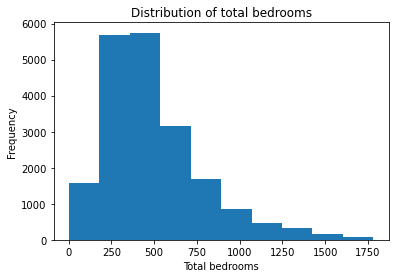

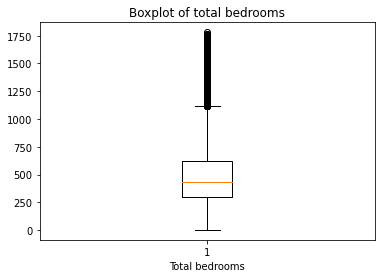

In [16]:
# Create a histogram of the total_bedrooms column
plt.hist(california_housing_prices_df['total_bedrooms'])
plt.xlabel('Total bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of total bedrooms')
plt.show()

# Create a boxplot of the total_bedrooms column
plt.boxplot(california_housing_prices_df['total_bedrooms'])
plt.xlabel('Total bedrooms')
plt.title('Boxplot of total bedrooms')
plt.show()

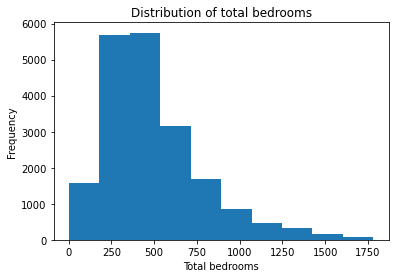

In [17]:
# Create a histogram of the total_bedrooms column
plt.hist(california_housing_prices_df['total_bedrooms'])
plt.xlabel('Total bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of total bedrooms')
plt.show()

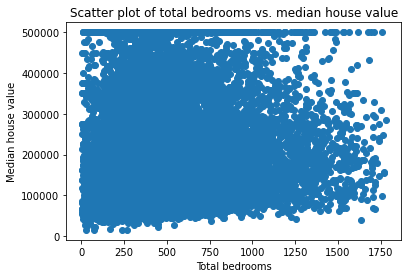

In [18]:
# Create a scatter plot of the total_bedrooms and median_house_value columns
plt.scatter(california_housing_prices_df['total_bedrooms'], california_housing_prices_df['median_house_value'])
plt.xlabel('Total bedrooms')
plt.ylabel('Median house value')
plt.title('Scatter plot of total bedrooms vs. median house value')
plt.show()

### 5. Split the data into training and test sets

In [19]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(california_housing_prices_df.drop('median_house_value', axis=1), california_housing_prices_df['median_house_value'], test_size=0.25, random_state=42)

# Create a OneHotEncoder object
one_hot_encoder = OneHotEncoder()

# Fit the OneHotEncoder object to the training data
one_hot_encoder.fit(X_train)

# Transform the training data using the OneHotEncoder object
X_train_encoded = one_hot_encoder.transform(X_train)

# Transform the test data using the OneHotEncoder object
X_test_encoded = one_hot_encoder.transform(X_test)

ValueError: Found unknown categories [-124.25, -124.05, -124.03, -123.88, -123.76, -123.63, -123.59, -123.4, -123.04, -118.81, -116.61, -116.58, -116.55, -116.49, -116.41, -116.27, -116.26, -116.08, -116.01, -115.93, -115.75, -115.48, -115.32, -115.22, -114.73, -114.66, -114.64, -114.63, -114.59, -114.56] in column 0 during transform

### 6. Choose a machine learning algorithm

In [ ]:
# Fit the DecisionTreeClassifier object to the training data
decision_tree_classifier.fit(X_train_encoded, y_train)

### 7. Train the machine learning model

In [ ]:
# Make predictions on the test data
y_pred = decision_tree_classifier.predict(X_test_encoded)

# Evaluate the model
accuracy = decision_tree_classifier.score(X_test_encoded, y_test)
print('Accuracy:', accuracy)

### 8. Evaluate the model

### 9. Deploy the model